#### Task 4(b): Take a grayscale image of size 512x512, add some Gaussian Noise & observe the Ringing Effect of Ideal Low Pass Filter on the image. Use different radius of Ideal Low Pass Filter & display their results

### Importing the Libraries

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Function for Ideal Low Pass Filter

In [8]:
def apply_ideal_low_pass_filter(image, cutoff_frequency):
    height, width = image.shape
    ideal_filter = np.zeros((height, width))

    for u in range(height):
        for v in range(width):
            D = np.sqrt((u - height / 2)**2 + (v - width / 2)**2)
            if (D <= cutoff_frequency):
                ideal_filter[u, v] = 1

    filtered_image = image * ideal_filter
    filtered_image = np.fft.ifftshift(filtered_image)
    filtered_image = np.fft.ifft2(filtered_image)
    return np.abs(filtered_image)

### Loading the Image

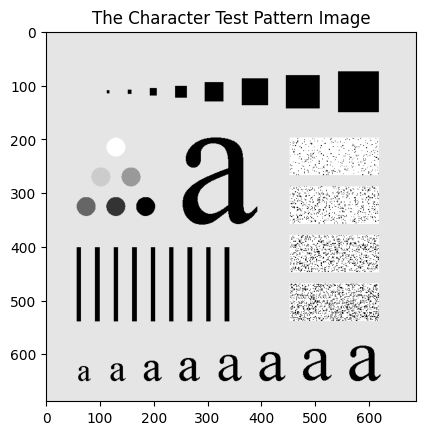

In [9]:
character_pattern_image = cv2.imread("./Characters Test Pattern 688x688.tif", 0)
plt.imshow(cv2.cvtColor(character_pattern_image, cv2.COLOR_BGR2RGB))
plt.title("The Character Test Pattern Image")
plt.show()

### Adding Gaussian Noise

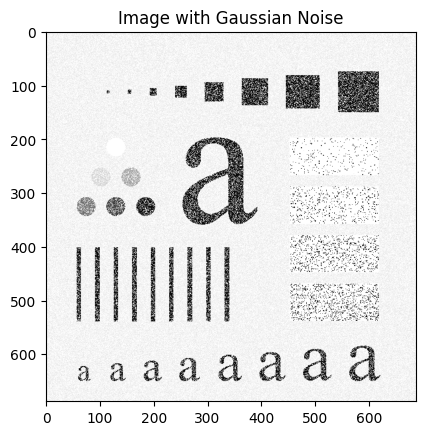

In [10]:
gaussian_noise = np.random.normal(7, 13, character_pattern_image.shape).astype(np.uint8)
noisy_character_image = cv2.add(character_pattern_image, gaussian_noise)
plt.imshow(cv2.cvtColor(noisy_character_image, cv2.COLOR_BGR2RGB))
plt.title("Image with Gaussian Noise")
plt.show()

### Applying FFT (Fast Fourier Transform)

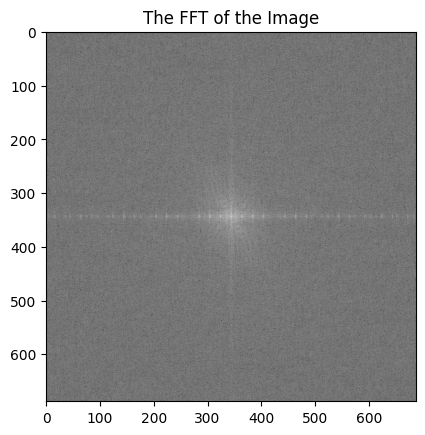

In [11]:
character_pattern_image_fft = np.fft.fftshift(np.fft.fft2(noisy_character_image))
plt.imshow(np.log(np.abs(character_pattern_image_fft)), cmap = "gray")
plt.title("The FFT of the Image")
plt.show()

### Applying Ideal Low Pass Filters of various Radius or Cutoff Frequency

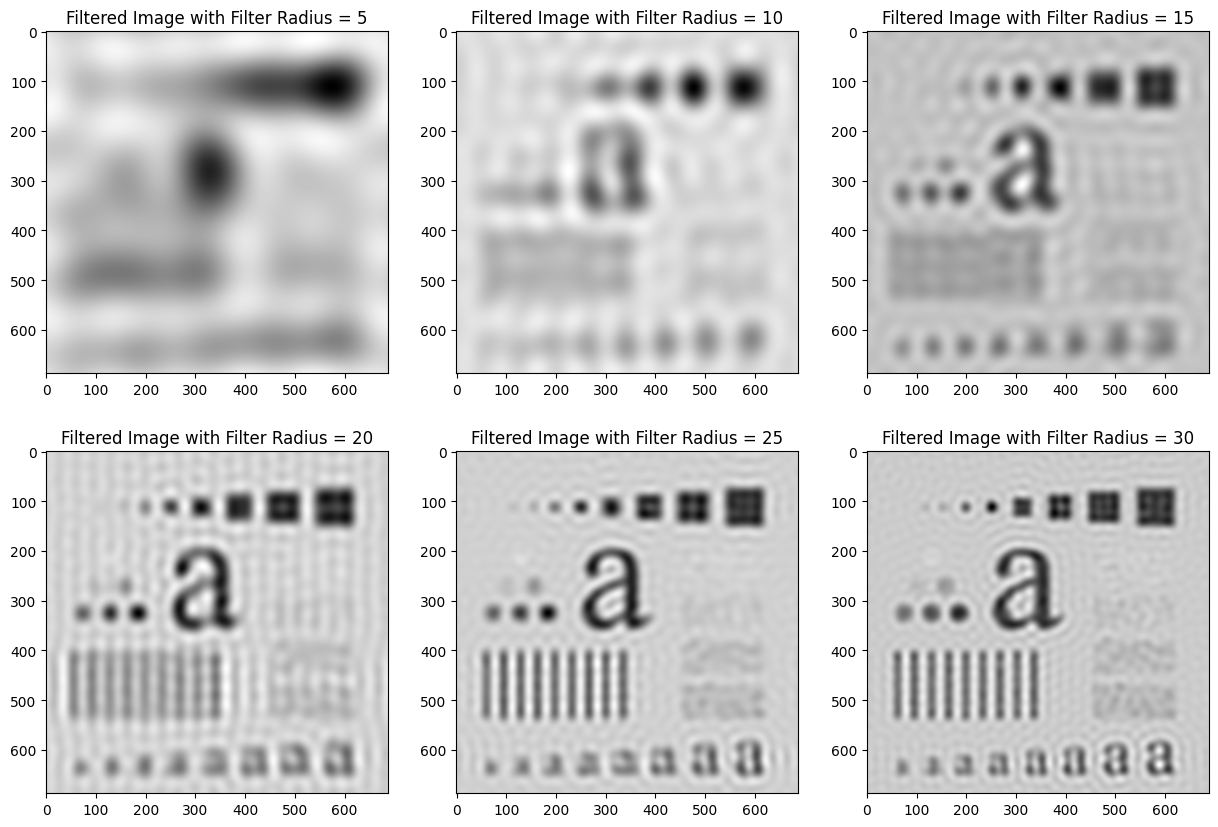

In [12]:
plt.figure(figsize = (15, 10))

for r in range(1, 7):
    filtered_image = apply_ideal_low_pass_filter(character_pattern_image_fft, r * 5)
    plt.subplot(2, 3, r)
    plt.imshow(filtered_image, cmap = "gray")
    plt.title(f"Filtered Image with Filter Radius = {r * 5}")

plt.show()